In [1]:
from models.reinforcement_learning import *

In [2]:
track_file = 'datasets/L-track.txt'
racetrack = Racetrack(track_file)

In [3]:
# Assuming your Simulator class and environment are correctly set up
simulator = Simulator(racetrack, 'original')  # Pass necessary parameters like racetrack and options

# Create a ValueIteration instance with the simulator
value_iteration = ValueIteration(simulator, gamma=0.99, theta=0.1)

# Run the Value Iteration algorithm
value_iteration.run()

num_iterations = value_iteration.get_iterations()
print(f"Value Iteration converged in {num_iterations} iterations.")

# Retrieve the computed optimal policy
optimal_policy = value_iteration.get_policy()


Value Iteration converged in 12 iterations.


In [4]:
# Print the optimal policy to see the recommended action for each state
for state, action in optimal_policy.items():
    print(f"State: {state}, Action: {action}")

State: (1, 6, -5, -5), Action: (-1, -1)
State: (1, 6, -5, -4), Action: (-1, -1)
State: (1, 6, -5, -3), Action: (-1, -1)
State: (1, 6, -5, -2), Action: (-1, -1)
State: (1, 6, -5, -1), Action: (-1, -1)
State: (1, 6, -5, 0), Action: (-1, -1)
State: (1, 6, -5, 1), Action: (-1, -1)
State: (1, 6, -5, 2), Action: (-1, -1)
State: (1, 6, -5, 3), Action: (-1, -1)
State: (1, 6, -5, 4), Action: (-1, -1)
State: (1, 6, -5, 5), Action: (-1, -1)
State: (1, 6, -4, -5), Action: (-1, -1)
State: (1, 6, -4, -4), Action: (-1, -1)
State: (1, 6, -4, -3), Action: (-1, -1)
State: (1, 6, -4, -2), Action: (-1, -1)
State: (1, 6, -4, -1), Action: (-1, -1)
State: (1, 6, -4, 0), Action: (-1, -1)
State: (1, 6, -4, 1), Action: (-1, -1)
State: (1, 6, -4, 2), Action: (-1, -1)
State: (1, 6, -4, 3), Action: (-1, -1)
State: (1, 6, -4, 4), Action: (-1, -1)
State: (1, 6, -4, 5), Action: (-1, -1)
State: (1, 6, -3, -5), Action: (-1, -1)
State: (1, 6, -3, -4), Action: (-1, -1)
State: (1, 6, -3, -3), Action: (-1, -1)
State: (1, 6

In [5]:
initial_state = (simulator.start_x, simulator.start_y, 0, 0)  # Example initial state
steps_taken = simulator.simulate_with_policy(optimal_policy)
print(f"Total steps taken to reach the finish: {steps_taken}")


Step 0: State (1, 6, 0, 0) -> Action (1, 0) -> New State (2, 6, 1, 0), Reward -1
Step 1: State (2, 6, 1, 0) -> Action (1, 0) -> New State (4, 6, 2, 0), Reward -1
Step 2: State (4, 6, 2, 0) -> Action (1, 0) -> New State (7, 6, 3, 0), Reward -1
Step 3: State (7, 6, 3, 0) -> Action (0, 0) -> New State (10, 6, 3, 0), Reward -1
Step 4: State (10, 6, 3, 0) -> Action (1, 0) -> New State (14, 6, 4, 0), Reward -1
Step 5: State (14, 6, 4, 0) -> Action (1, 0) -> New State (19, 6, 5, 0), Reward -1
Step 6: State (19, 6, 5, 0) -> Action (1, 1) -> New State (24, 7, 5, 1), Reward -1
Step 7: State (24, 7, 5, 1) -> Action (-1, -1) -> New State (28, 7, 4, 0), Reward -1
Step 8: State (28, 7, 4, 0) -> Action (-1, -1) -> New State (31, 6, 3, -1), Reward -1
Step 9: State (31, 6, 3, -1) -> Action (-1, -1) -> New State (33, 4, 2, -2), Reward -1
Step 10: State (33, 4, 2, -2) -> Action (0, -1) -> New State (35, 1, 0, 0), Reward 0
Simulation ends at state (35, 1, 0, 0) after 11 steps.
Total steps taken to reach t

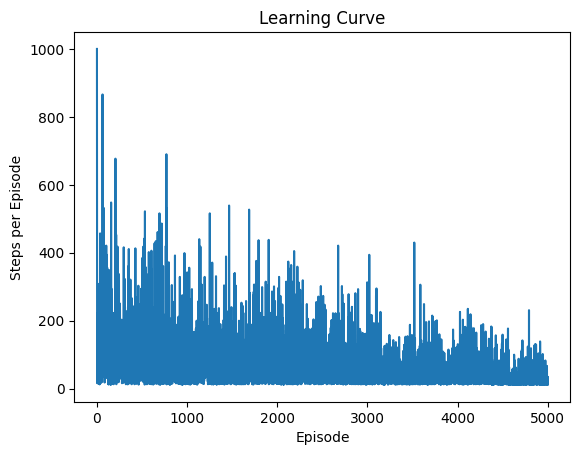

In [6]:
import matplotlib.pyplot as plt
q_learning = QLearning(simulator,alpha=0.1,gamma=0.99,epsilon=0.9)
# Run the training
num_episodes = 5000
q_learning.train(num_episodes)

# Get the data from the training
iterations, steps_to_finish, avg_steps_per_episode = q_learning.train(num_episodes)

# Plot the learning curve
plt.plot(range(1, num_episodes + 1), avg_steps_per_episode)
plt.xlabel('Episode')
plt.ylabel('Steps per Episode')
plt.title('Learning Curve')
plt.show()

In [7]:
# Simulate the racetrack with the learned optimal policy
initial_state = (simulator.start_x, simulator.start_y, 0, 0)  # Example initial state
steps_taken = simulator.simulate_with_policy(optimal_policy)
print(f"Total steps taken to reach the finish: {steps_taken}")

Step 0: State (1, 9, 0, 0) -> Action (1, -1) -> New State (2, 8, 1, -1), Reward -1
Step 1: State (2, 8, 1, -1) -> Action (1, 0) -> New State (4, 7, 2, -1), Reward -1
Step 2: State (4, 7, 2, -1) -> Action (1, 0) -> New State (6, 6, 2, -1), Reward -1
Step 3: State (6, 6, 2, -1) -> Action (0, 1) -> New State (8, 6, 2, 0), Reward -1
Step 4: State (8, 6, 2, 0) -> Action (1, 0) -> New State (11, 6, 3, 0), Reward -1
Step 5: State (11, 6, 3, 0) -> Action (1, 0) -> New State (15, 6, 4, 0), Reward -1
Step 6: State (15, 6, 4, 0) -> Action (-1, -1) -> New State (1, 8, 0, 0), Reward -1
Step 7: State (1, 8, 0, 0) -> Action (1, -1) -> New State (2, 7, 1, -1), Reward -1
Step 8: State (2, 7, 1, -1) -> Action (1, 0) -> New State (4, 6, 2, -1), Reward -1
Step 9: State (4, 6, 2, -1) -> Action (1, 1) -> New State (7, 6, 3, 0), Reward -1
Step 10: State (7, 6, 3, 0) -> Action (0, 0) -> New State (10, 6, 3, 0), Reward -1
Step 11: State (10, 6, 3, 0) -> Action (1, 0) -> New State (14, 6, 4, 0), Reward -1
Step 

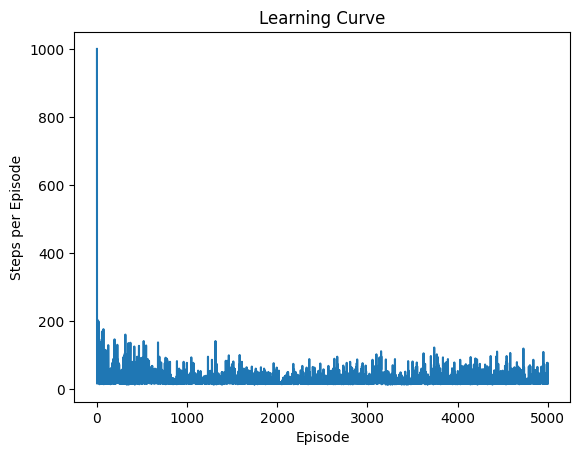

In [8]:
import matplotlib.pyplot as plt
q_learning = SARSA(simulator,alpha=0.5,gamma=0.99,epsilon=0.6)
# Run the training
num_episodes = 5000
q_learning.train(num_episodes)

# Get the data from the training
iterations, steps_to_finish, avg_steps_per_episode = q_learning.train(num_episodes)

# Plot the learning curve
plt.plot(range(1, num_episodes + 1), avg_steps_per_episode)
plt.xlabel('Episode')
plt.ylabel('Steps per Episode')
plt.title('Learning Curve')
plt.show()

In [9]:
# Simulate the racetrack with the learned optimal policy
initial_state = (simulator.start_x, simulator.start_y, 0, 0)  # Example initial state
steps_taken = simulator.simulate_with_policy(optimal_policy)
print(f"Total steps taken to reach the finish: {steps_taken}")

Step 0: State (1, 9, 0, 0) -> Action (1, -1) -> New State (2, 8, 1, -1), Reward -1
Step 1: State (2, 8, 1, -1) -> Action (1, 0) -> New State (3, 7, 1, -1), Reward -1
Step 2: State (3, 7, 1, -1) -> Action (1, 0) -> New State (5, 6, 2, -1), Reward -1
Step 3: State (5, 6, 2, -1) -> Action (0, 1) -> New State (7, 6, 2, 0), Reward -1
Step 4: State (7, 6, 2, 0) -> Action (1, 0) -> New State (10, 6, 3, 0), Reward -1
Step 5: State (10, 6, 3, 0) -> Action (1, 0) -> New State (14, 6, 4, 0), Reward -1
Step 6: State (14, 6, 4, 0) -> Action (1, 0) -> New State (18, 6, 4, 0), Reward -1
Step 7: State (18, 6, 4, 0) -> Action (-1, 0) -> New State (21, 6, 3, 0), Reward -1
Step 8: State (21, 6, 3, 0) -> Action (0, 1) -> New State (24, 7, 3, 1), Reward -1
Step 9: State (24, 7, 3, 1) -> Action (1, -1) -> New State (28, 7, 4, 0), Reward -1
Step 10: State (28, 7, 4, 0) -> Action (-1, -1) -> New State (31, 6, 3, -1), Reward -1
Step 11: State (31, 6, 3, -1) -> Action (-1, -1) -> New State (34, 5, 3, -1), Rewar

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt

# def run_experiments(algorithm, num_experiments, num_episodes, track_file):
#     all_steps_to_finish = []

#     for _ in range(num_experiments):
#         _, steps_to_finish, _ = algorithm.train(num_episodes)
#         print(steps_to_finish)
#         print(len(steps_to_finish))
#         all_steps_to_finish.append(steps_to_finish)

#     avg_steps_to_finish = np.mean(all_steps_to_finish, axis=0)

#     return avg_steps_to_finish

# # Set up the experiment parameters
# num_experiments = 10
# num_episodes = 2000
# track_file = "datasets/R-track.txt"

# # Create a Q-learning agent
# q_learning = QLearning(Simulator(Racetrack(track_file)))

# # Run the experiments
# avg_steps_to_finish = run_experiments(q_learning, num_experiments, num_episodes, track_file)

# # Plot the average steps to finish
# plt.figure()
# plt.plot(range(1, num_episodes + 1), avg_steps_to_finish)
# plt.xlabel("Episode")
# plt.ylabel("Average Steps to Finish")
# plt.title(f"Q-Learning - {track_file}")
# plt.show()